In [1]:
import matplotlib.pyplot as plt
#import pandas and load data
import pandas as pd
file_to_load = "Instructions/HeroesOfPymoli/Resources/purchase_data.csv"
data = pd.read_csv(file_to_load)
data.head()
data["SN"] = data["SN"].astype(str)
data["Gender"] = data["Gender"].astype(str)
data["Item Name"] = data["Item Name"].astype(str)
#data.describe()
data.dtypes

Purchase ID      int64
SN              object
Age              int64
Gender          object
Item ID          int64
Item Name       object
Price          float64
dtype: object

In [33]:
#Get age group label for age
def get_age_group_label(age):
    int_age = int(age)
    age_group_label = ""
    if int_age<10:
        age_group_label = "0-10"
    elif int_age<15:
        age_group_label = "10-14"
    elif int_age<20:
        age_group_label = "15-19"
    elif int_age<25:
        age_group_label = "20-24"
    elif int_age<30:
        age_group_label = "25-29"
    elif int_age<35:
        age_group_label = "30-34"
    elif int_age<40:
        age_group_label = "35-39"
    elif int_age>=40:
        age_group_label = "40+"
    else:
        age_group_label = "Unknown"
    return age_group_label
#Get age group order for age
def get_age_group_order(age):
    int_age = int(age)
    age_group_order = 0
    if int_age<10:
        age_group_order = 0
    elif int_age<15:
        age_group_order = 1
    elif int_age<20:
        age_group_order = 2
    elif int_age<25:
        age_group_order = 3
    elif int_age<30:
        age_group_order = 4
    elif int_age<35:
        age_group_order = 5
    elif int_age<40:
        age_group_order = 6
    elif int_age>=40:
        age_group_order = 7
    else:
        age_group_order = 8
    return age_group_order

In [3]:
#Add Age summary columns
#Note: Grouped age using if then logic and bins for practice using both techniques

data["Age Group"] = data["Age"].apply(get_age_group_label)
data["Age Group Order"] = data["Age"].apply(get_age_group_order)

#Build bins
bins = []
bin_names = []
min_age = data["Age"].min()
print(f"Lowest Age: {str(min_age)}")
max_age = data["Age"].max()
print(f"Highest Age: {str(max_age)}")
bin_range = 5
bins_cuts = int((max_age - (max_age%10))/bin_range)
for bin in range(0,bins_cuts+1):
    #Get Bin Cut
    bin_cut = 0
    if bin==0:
        bin_cut = min_age-1
    elif bin<=(bins_cuts-1):
        bin_cut = (bin*bin_range)+(bin_range-1)
    else:
        bin_cut = max_age+1
    bins.append(bin_cut)
    #Get Bin Label
    if bin==0:
        bin_names.append(f"<{bin_range*2}")
    elif bin<=(bins_cuts-2):
        bin_names.append(f"{bin_cut+1}-{bin_cut+bin_range}")
    elif bin==(bins_cuts-1):
        bin_names.append(f"{bin_cut+1}+")
    else:
        pass
print(f"Age Bins: {bins}")
print(f"Age Bin Labels: {bin_names}")

#Assign Age bins
data["Age Bin"] = pd.cut(data["Age"], bins, labels=bin_names)

datadf = pd.DataFrame(data)
datadf.head()

Lowest Age: 7
Highest Age: 45
Age Bins: [6, 9, 14, 19, 24, 29, 34, 39, 46]
Age Bin Labels: ['<10', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40+']


,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price,Age Group,Age Group Order,Age Bin
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53,20-24,3,20-24
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56,40+,7,40+
2,2,Ithergue48,24,Male,92,Final Critic,4.88,20-24,3,20-24
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27,20-24,3,20-24
4,4,Iskosia90,23,Male,131,Fury,1.44,20-24,3,20-24


In [4]:
#Total number of players
unique_players = data.SN.unique()
total_players = len(unique_players)
print(f"Total Players: {total_players}")
sorted(unique_players)

Total Players: 576


['Adairialis76',
 'Adastirin33',
 'Aeda94',
 'Aela59',
 'Aelaria33',
 'Aelastirin39',
 'Aelidru27',
 'Aelin32',
 'Aelly27',
 'Aellynun67',
 'Aellyria80',
 'Aelollo59',
 'Aenarap34',
 'Aeral43',
 'Aeral68',
 'Aeral97',
 'Aeralria27',
 'Aeralstical35',
 'Aeri84',
 'Aerillorin70',
 'Aerithllora36',
 'Aerithnucal56',
 'Aerithnuphos61',
 'Aerithriaphos45',
 'Aerithriaphos46',
 'Aesri53',
 'Aesty53',
 'Aestysu37',
 'Aesur96',
 'Aesurstilis64',
 'Aethedru70',
 'Aidai53',
 'Aidai61',
 'Aidai73',
 'Aidaillodeu39',
 'Aidain51',
 'Aidaira26',
 'Aiduecal76',
 'Aiduesu86',
 'Aillyriadru65',
 'Aillyrin83',
 'Aina42',
 'Aina43',
 'Airi27',
 'Aisur51',
 'Aisurdru79',
 'Aisurria69',
 'Aithelis62',
 'Alaephos75',
 'Alaesu77',
 'Alaesu91',
 'Alarap40',
 'Ali84',
 'Alim85',
 'Alo38',
 'Anallorgue57',
 'Ardcil81',
 'Ardonmol96',
 'Arin32',
 'Arirgue63',
 'Assassa81',
 'Assassasta79',
 'Assastnya25',
 'Assehoan67',
 'Assesi91',
 'Assilsan72',
 'Assim27',
 'Assirra56',
 'Assistasda42',
 'Assistasda90',
 'Ass

In [5]:
#Unique Items
unique_items = data["Item ID"].unique()
total_items = len(unique_items)
print(f"Total Items: {total_items}")
sorted(unique_items)

Total Items: 183


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183]

In [6]:
#Total purchase analysis
average_price = round(data["Price"].mean(),2)
purchases = len(data)
total_revenue = data["Price"].sum()
total_purchase_data = {'Unique Items':[total_items],
    'Average Price':[average_price],
    'Purchases':[purchases],
    'Total Revenue':[total_revenue]}
total_purchase_data_df = pd.DataFrame(total_purchase_data)
total_purchase_data_df["Average Price"] = total_purchase_data_df["Average Price"].astype(float).map('${:,.2f}'.format)
total_purchase_data_df["Total Revenue"] = total_purchase_data_df["Total Revenue"].astype(float).map('${:,.2f}'.format)
total_purchase_data_df

,Unique Items,Average Price,Purchases,Total Revenue
0,183,$3.05,780,"$2,379.77"


In [7]:
#Gender statistics

#Group by player and gender
gender_grouping = ["SN","Gender"]
gdf = datadf.copy()
gg = gdf.groupby(gender_grouping).agg({'SN':'count',
                                       'Age':'mean',
                                       'Price':'sum'})
gg = gg.rename(columns={'SN':'Purchases'})
gg["Purchases"] = gg["Purchases"].astype(int)
gg["Age"] = gg["Age"].astype(float)
gg["Price"] = gg["Price"].astype(float)
#Group by gender
gc = gg.groupby(["Gender"]).agg({'Purchases':'count',
                                 'Age':'mean'})
gc = gc.rename(columns={'Purchases':'Players',
                        'Age':'Average Age'})
gc["Average Age"] = gc["Average Age"].astype(float).map("{:,.1f}".format)
#Add % players column
gc["% Players"] = ((gc["Players"]*100.0)/(total_players*1.0)).astype(float).map("{:,.2f}%".format)
gc

,Players,Average Age,% Players
Gender,,,
Female,81,21.3,14.06%
Male,484,23.0,84.03%
Other / Non-Disclosed,11,22.3,1.91%


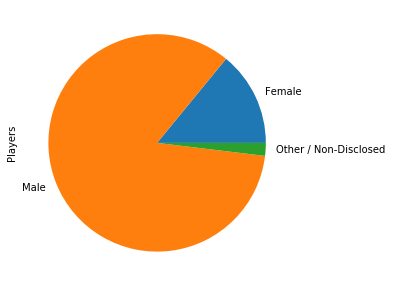

In [8]:
#Gender Pie Chart
plot = gc.plot.pie(y='Players', figsize=(5, 5), legend=False)

In [9]:
#Gender Purchase Analysis
gp = pd.DataFrame(gg)
gp = gp.groupby(["Gender"]).agg({'Purchases':['sum','count'],
                                 'Price':['sum','mean'],})
gp.columns = ["_".join(x) for x in gp.columns.ravel()]
gp = gp.rename(columns={'Purchases_sum':'Purchases',
                        'Purchases_count':'Players',
                        'Price_sum':'Total Sales',
                        'Price_mean':'Average Total Sale per Person'})
gp["Average Purchase Price"] = (gp["Total Sales"]/(gp["Purchases"]*1.0)).astype(float)
gp["Purchases"] = gp["Purchases"].astype(int)
gp["Total Sales"] = gp["Total Sales"].astype(float)
gp["Average Total Sale per Person"] = gp["Average Total Sale per Person"].astype(float)

Text(0, 0.5, 'Total $')

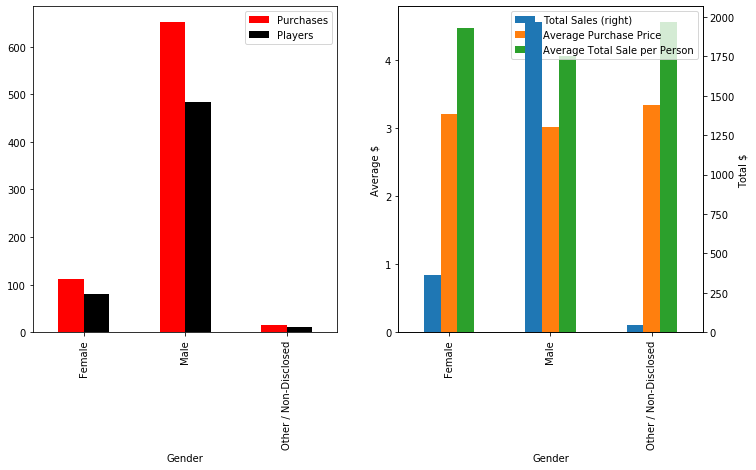

In [10]:
#Gender Purchase Charts
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
gp_int = gp.loc[:,['Purchases','Players']]
gp_int.plot(kind='bar',color=["red","black"],ax=ax)
ax2 = fig.add_subplot(122)
gp_price = gp.loc[:,['Total Sales','Average Purchase Price','Average Total Sale per Person']]
gp_price.plot(kind='bar',secondary_y=['Total Sales'],ax=ax2)
ax2.set_ylabel('Average $')
ax2.right_ax.set_ylabel('Total $')

In [11]:
#Gender Purchase Text 
gp["Average Purchase Price"] = (gp["Total Sales"]/(gp["Purchases"]*1.0)).astype(float).map("${:,.2f}".format)
gp["Purchases"] = gp["Purchases"].astype(int)
gp["Total Sales"] = gp["Total Sales"].astype(float).map("${:,.2f}".format)
gp["Average Total Sale per Person"] = gp["Average Total Sale per Person"].astype(float).map("${:,.2f}".format)
gpa = gp.loc[:,["Purchases",
                "Total Sales",
                "Average Purchase Price",
                "Average Total Sale per Person"]]
gpa

,Purchases,Total Sales,Average Purchase Price,Average Total Sale per Person
Gender,,,,
Female,113,$361.94,$3.20,$4.47
Male,652,"$1,967.64",$3.02,$4.07
Other / Non-Disclosed,15,$50.19,$3.35,$4.56


In [12]:
#Age Demographics by Case

#Group by player and age group
age_grouping = ["SN","Age Group"]
adf = datadf.copy()
adf["Age Group"] = adf["Age Group"].astype(str)
adf["Age Group Order"] = adf["Age Group Order"].astype(int)
ad = adf.groupby(age_grouping).agg({'SN':'count',
                                    'Price':'sum',
                                    'Age Group Order':'mean'})
ad = ad.rename(columns={"SN":"Purchases"})
ad["Purchases"] = ad["Purchases"].astype(int)
#Group by age group
ac = ad.groupby(["Age Group"]).agg({'Purchases':'count',
                                    'Age Group Order':'mean'})
ac = ac.rename(columns={'Purchases':'Players'})
#Add % players column
ac["% Players"] = ((ac["Players"]*100.0)/(total_players*1.0)).astype(float)

In [13]:
#Age Formatted Text
ac["% Players"] = ((ac["Players"]*100.0)/(total_players*1.0)).astype(float).map("{:,.2f}%".format)
ac.loc[:,["Players","% Players"]]

,Players,% Players
Age Group,,
0-10,17,2.95%
10-14,22,3.82%
15-19,107,18.58%
20-24,258,44.79%
25-29,77,13.37%
30-34,52,9.03%
35-39,31,5.38%
40+,12,2.08%


In [32]:
## Age Purchases by Bins

bin_groupings = ["SN","Age Bin"]
abf = data.groupby(bin_groupings).agg({'SN':'count',
                                     'Age':'mean',
                                     'Price':['sum','mean']})
abf.columns = ["_".join(x) for x in abf.columns.ravel()]
abf = abf.rename(columns={'SN_count':'Purchases',
                        'Age_mean':'Age',
                        "Price_sum":"Total Purchase Value",
                        "Price_mean":"Average Purchase Price"
                       })
ab = abf.groupby(["Age Bin"]).agg({'Purchases':'count'})
ab["% Purchases"] = ((ab["Purchases"]*100.0)/(purchases*1.0)).astype(float).map("{:,.2f}%".format)
ab


,Purchases,% Purchases
Age Bin,,
<10,17,2.18%
10-14,22,2.82%
15-19,107,13.72%
20-24,258,33.08%
25-29,77,9.87%
30-34,52,6.67%
35-39,31,3.97%
40+,12,1.54%


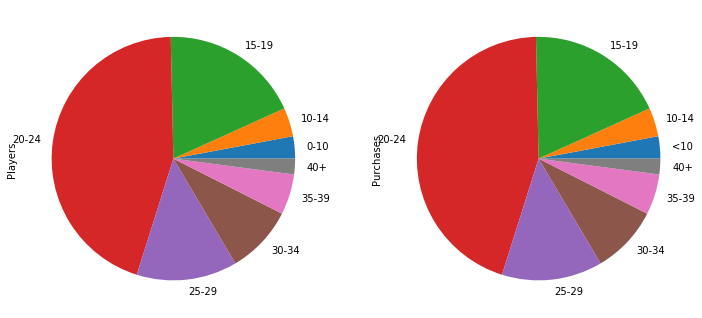

In [15]:
#Age Pie Chart
figp = plt.figure(figsize=(12,12))
axp = figp.add_subplot(121)
plot = ac.plot.pie(y='Players',legend=False,ax=axp)
axp2 = figp.add_subplot(122)
plot = ab.plot.pie(y='Purchases',legend=False,ax=axp2)

In [16]:
#Purchase Analysis by Age Group

#Group by Player
age_groupings = ["SN","Age Group"]
pg = adf.groupby(age_groupings).agg({"Age":"mean",
                                     "Purchase ID":"count",
                                     "Price":["sum","mean"],
                                     "Age Group Order":"mean"})
pg.columns = ["_".join(x) for x in pg.columns.ravel()]
pg = pg.rename(columns={"Age_mean":"Age",
                        "Purchase ID_count":"Purchases",
                        "Price_sum":"Total Purchase Value",
                        "Price_mean":"Average Purchase Value",
                        "Age Group Order_mean":"Age Group Order"})
pg["Age"] = pg["Age"].astype(float)
pg["Total Purchase Value"] =pg["Total Purchase Value"].astype(float)
pg["Purchases"] = pg["Purchases"].astype(float)

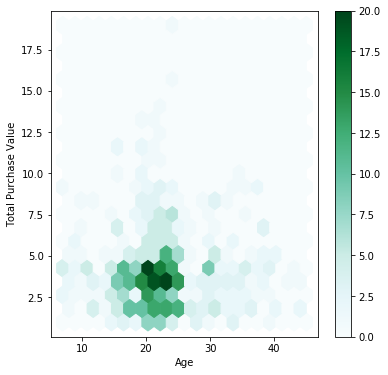

In [17]:
#Age by Price Chart
figt = plt.figure(figsize=(6,6))
axt1 = figt.add_subplot(111)
pg.plot.hexbin(x='Age',y='Total Purchase Value',gridsize=20,ax=axt1)

In [18]:
#Purchases by Age Group
ap = pg.groupby(["Age Group"]).agg({'Purchases':['sum','count'],
                                    'Total Purchase Value':['sum','mean']})
ap.columns = ["_".join(x) for x in ap.columns.ravel()]
ap = ap.rename(columns={'Purchases_sum':'Purchases',
                        'Purchases_count':'Players',
                        'Total Purchase Value_sum':'Total Purchase Value',
                        'Total Purchase Value_mean':'Average Total Sale per Person',
                        "Average Purchase Value_mean":"Average Purchase Value"})
ap["Average Purchase Price"] = ap["Total Purchase Value"]/(ap["Purchases"]*1.0)

Text(0, 0.5, 'Total $')

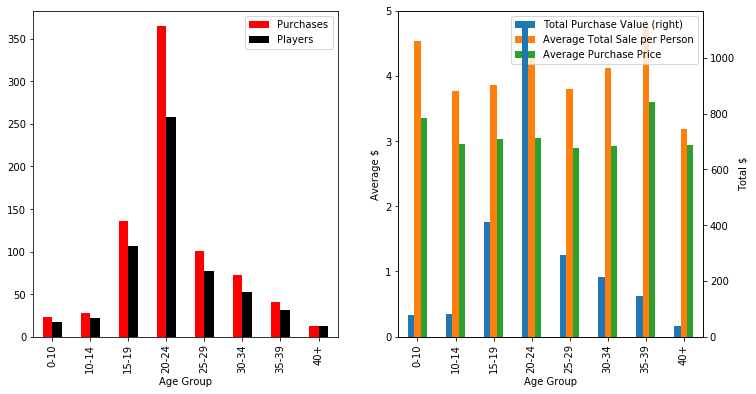

In [19]:
#Age Purchase Charts
fig2 = plt.figure(figsize=(12,6))
ax3 = fig2.add_subplot(121)
ap_int = ap.loc[:,['Purchases','Players']]
ap_int.plot(kind='bar',
            color=["red","black"],
            ax=ax3)
ax4 = fig2.add_subplot(122)
ap_price = ap.loc[:,['Total Purchase Value',
                     'Average Total Sale per Person',
                     'Average Purchase Price']]
ap_price.plot(kind='bar',secondary_y=['Total Purchase Value'],ax=ax4)
ax4.set_ylabel('Average $')
ax4.right_ax.set_ylabel('Total $')

In [20]:
#Age Purchase Text
ap["Purchases"] = ap["Purchases"].astype(int)
ap["Total Purchase Value"] = ap["Total Purchase Value"].astype(float).map("${:,.2f}".format)
ap["Average Total Sale per Person"] = ap["Average Total Sale per Person"].astype(float).map("${:,.2f}".format)
ap["Average Purchase Price"] = ap["Average Purchase Price"].astype(float).map("${:,.2f}".format)
ap.loc[:,["Purchases","Average Purchase Price","Total Purchase Value","Average Total Sale per Person"]]

,Purchases,Average Purchase Price,Total Purchase Value,Average Total Sale per Person
Age Group,,,,
0-10,23,$3.35,$77.13,$4.54
10-14,28,$2.96,$82.78,$3.76
15-19,136,$3.04,$412.89,$3.86
20-24,365,$3.05,"$1,114.06",$4.32
25-29,101,$2.90,$293.00,$3.81
30-34,73,$2.93,$214.00,$4.12
35-39,41,$3.60,$147.67,$4.76
40+,13,$2.94,$38.24,$3.19


In [21]:
#Top Spenders
ts = data.groupby("SN").agg({"SN":"count",
                              "Price":["mean","sum"]})
ts.columns = ["_".join(x) for x in ts.columns.ravel()]
ts = ts.rename(columns={'SN_count':'Purchases',
                          'Price_mean':'Average Purchase Price',
                          'Price_sum':'Total Purchase Value'
                         })
ts["Average Purchase Price"] = ts["Average Purchase Price"].astype(float).map("${:,.2f}".format)
ts = ts.sort_values('Total Purchase Value',ascending=False)
ts["Total Purchase Value"] = ts["Total Purchase Value"].astype(float).map("${:,.2f}".format)
ts.head()


,Purchases,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,$3.79,$18.96
Idastidru52,4,$3.86,$15.45
Chamjask73,3,$4.61,$13.83
Iral74,4,$3.40,$13.62
Iskadarya95,3,$4.37,$13.10


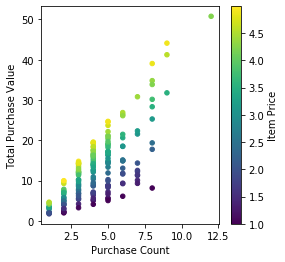

In [22]:
#Most Popular Items
popular_groupings=["Item ID","Item Name"]
mp = data.groupby(popular_groupings).agg({"Purchase ID":"count",
                                           "Price":["mean","sum"]
                                           })
mp.columns = ["_".join(x) for x in mp.columns.ravel()]
mp = mp.rename(columns={"Purchase ID_count":"Purchase Count",
                        "Price_mean":"Item Price",
                        "Price_sum":"Total Purchase Value"
                       })
mp = mp.sort_values('Purchase Count',ascending=False)
mpo = mp.copy()
mpo["Purchase Count"] = mpo["Purchase Count"].astype(float)
mpo["Total Purchase Value"] = mpo["Total Purchase Value"].astype(float)
figmp = plt.figure(figsize=(4,4))
axmp = figmp.add_subplot(111)
mpo.plot.scatter(x='Purchase Count',y='Total Purchase Value',c='Item Price',colormap='viridis',ax=axmp)

In [23]:
mpo["Purchase Count"] = mpo["Purchase Count"].astype(int)
mpo["Item Price"] = mpo["Item Price"].astype(float).map("${:,.2f}".format)
mpo["Total Purchase Value"] = mpo["Total Purchase Value"].astype(float).map("${:,.2f}".format)
mpo.head()

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
145,Fiery Glass Crusader,9,$4.58,$41.22
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77
82,Nirvana,9,$4.90,$44.10
19,"Pursuit, Cudgel of Necromancy",8,$1.02,$8.16


In [24]:
#Most Profitable Items
mpr = mp.copy()
mpr = mpr.sort_values('Total Purchase Value',ascending=False)
mpr["Item Price"] = mpr["Item Price"].astype(float).map("${:,.2f}".format)
mpr["Total Purchase Value"] = mpr["Total Purchase Value"].astype(float).map("${:,.2f}".format)
mpr.head()

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
82,Nirvana,9,$4.90,$44.10
145,Fiery Glass Crusader,9,$4.58,$41.22
92,Final Critic,8,$4.88,$39.04
103,Singed Scalpel,8,$4.35,$34.80
